# Gesture Recognition - 3D CNN - By Saravanakumar PERUMAL
In this group project, you are going to build a 3D Conv model that will be able to predict the 5 gestures correctly. Please import the following libraries to get started.

In [1]:
from keras.models import Sequential, Model
from keras.layers import Dense, GRU, Flatten, TimeDistributed, Flatten, BatchNormalization, Activation
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
#from keras.layers.convolutional import Conv3D, MaxPooling3D
from keras.layers import  Input,Conv3D, MaxPooling3D
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras import optimizers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D,AveragePooling3D 
from tensorflow.keras.regularizers import l2
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.layers import GlobalAveragePooling3D

In [2]:
import numpy as np
import os
#from scipy.misc import imread, imresize
import imageio
#img = imageio.imread('your_image.jpg')
import datetime
import os
import cv2

In [3]:
np.random.seed(30)
import random as rn
rn.seed(30)
from keras import backend as K
import tensorflow as tf
#tf.set_random_seed(30)
tf.random.set_seed(42) 

In this block, you read the folder names for training and validation. You also set the `batch_size` here. Note that you set the batch size in such a way that you are able to use the GPU in full capacity. You keep increasing the batch size until the machine throws an error.

In [4]:
train_doc = np.random.permutation(open('Gesture_Project_data/train.csv').readlines())
val_doc = np.random.permutation(open('Gesture_Project_data/val.csv').readlines())

#train_doc = np.random.permutation(open('/home/datasets/Project_data/train.csv').readlines())
#val_doc = np.random.permutation(open('/home/datasets/Project_data/val.csv').readlines())
#train_doc = np.random.permutation(open('/home/datasets/Project_data/train.csv').readlines())
#val_doc = np.random.permutation(open('/datasets/Project_data/val.csv').readlines())
#batch_size = 1 #experiment with the batch size

## Generator
This is one of the most important part of the code. The overall structure of the generator has been given. In the generator, you are going to preprocess the images as you have images of 2 different dimensions as well as create a batch of video frames. You have to experiment with `img_idx`, `y`,`z` and normalization such that you get high accuracy.

In [5]:
#pip install opencv-python
import cv2


In [6]:
img_idx = [num for num in range(30)]
#img_idx =  img_idx[::2]
#img_idx

In [7]:

new_width  =  120
new_height = 120
#img_idx = [num for num in range(30)]
#img_idx =  img_idx[::5] #only 5 images to start with
time_dimen = len(img_idx)
print("Time Dimen :", time_dimen)
#num_batches = 50
batch_size = 40 #experiment with the batch size
num_channels = 3
num_classes = 5
num_epochs = 50 # It should be 50 / 100
train_path = './Gesture_Project_data/train'
val_path = './Gesture_Project_data/val'



Time Dimen : 30


In [8]:
def generator(source_path, folder_list, batch_size, total_seq) : 
    print( 'Source path = ', source_path, '; batch size =', batch_size)
    #create a list of image numbers you want to use for a particular video
    #img_idx = img_idx = [num for num in range(30)]
    #img_idx =  img_idx[::5] #only 5 images to start with
    img_idx = [num for num in range(30)]
    img_idx =  img_idx[::5] #only 5 images to start with
    time_dimen = len(img_idx)
    img_idx = img_idx
    #num_batches = (int) (total_seq / batch_size )
    new_width  =  120
    new_height = 120
    while True:
        t = np.random.permutation(folder_list)
        num_batches = (int) (total_seq / batch_size ) # start with 1 batch once --calculate the number of batches
        #print("Num Batches :",num_batches)
        for batch in range(num_batches): # we iterate over the number of batches
            #batch_size - Batch Size / Number of batches
            #x - Number of images / Number of time steps in video sequence
            #y - image size x
            #z - image size y
            #3 - RGB channel
            x = time_dimen
            y = new_height
            z = new_height
            #print("batch :",batch)
            batch_data = np.zeros((batch_size,x,y,z,3)) # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
            batch_labels = np.zeros((batch_size,num_classes)) # batch_labels is the one hot representation of the output
            for folder in range(batch_size): # iterate over the batch_size
                #print("batch*batch_size : ",batch*batch_size)
                imgs = os.listdir(source_path+'/'+ t[folder + (batch*batch_size)].split(';')[0]) # read all the images in the folder
                for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                    image = cv2.imread(source_path+'/'+ t[folder + (batch*batch_size)].strip().split(';')[0]+'/'+imgs[item])
                    image = cv2.resize(image, (new_width, new_height))
                    #crop the images and resize them. Note that the images are of 2 different shape 
                    #and the conv3D will throw error if the inputs in a batch have different shapes
                    # Convert the image to float32
                    image = image.astype(np.float32)
                    # Normalize the image to the range [0, 1]
                    normalized_img = image / 255.0
                    # Display or save the normalized image
                    #cv2.imshow('Normalized Image', normalized_img)
                    #cv2.waitKey(0)
                    #cv2.destroyAllWindows()
                    imageR = normalized_img[:, :, 0] 
                    imageG = normalized_img[:, :, 1] 
                    imageB = normalized_img[:, :, 2]
                    #imageR=imageR.astype(np.float32)
                    #imageR = imageR / 255.0
                    #imageG=imageG.astype(np.float32)
                    #imageG = imageG / 255.0
                    #imageB=imageB.astype(np.float32)
                    #imageB = imageB / 255.0                    
                    batch_data[folder,idx,:,:,0] = imageR  #normalise and feed in the image
                    batch_data[folder,idx,:,:,1] = imageG  #normalise and feed in the image
                    batch_data[folder,idx,:,:,2] = imageB  #normalise and feed in the image

                batch_labels[folder, int(t[folder + (batch*batch_size)].strip().split(';')[2])] = 1
            yield batch_data, batch_labels #you yield the batch_data and the batch_labels, remember what does yield do
        if (total_seq%batch_size) > 0: #remaining delta elements             
            new_batch_size = total_seq%batch_size
            #print("New Batch Size",new_batch_size)
            x = time_dimen
            y = new_height
            z = new_height
            last_batch_data = np.zeros((new_batch_size,x,y,z,3)) # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
            last_batch_labels = np.zeros((new_batch_size,num_classes)) # batch_labels is the one hot representation of the output
            for folder in range(new_batch_size): # iterate over the batch_size
                #print("num_batches*batch_size : ",num_batches*batch_size)
                imgs = os.listdir(source_path+'/'+ t[folder + (num_batches*batch_size)].split(';')[0]) # read all the images in the folder
                for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                    image = cv2.imread(source_path+'/'+ t[folder + (num_batches*batch_size)].strip().split(';')[0]+'/'+imgs[item])
                    image = cv2.resize(image, (new_width, new_height))
                    #crop the images and resize them. Note that the images are of 2 different shape 
                    #and the conv3D will throw error if the inputs in a batch have different shapes
                    # Convert the image to float32
                    image = image.astype(np.float32)
                    # Normalize the image to the range [0, 1]
                    normalized_img = image / 255.0
                    # Display or save the normalized image
                    #cv2.imshow('Normalized Image', normalized_img)
                    #cv2.waitKey(0)
                    #cv2.destroyAllWindows()
                    imageR = normalized_img[:, :, 0] 
                    imageG = normalized_img[:, :, 1] 
                    imageB = normalized_img[:, :, 2]
                    #imageR=imageR.astype(np.float32)
                    #imageR = imageR / 255.0
                    #imageG=imageG.astype(np.float32)
                    #imageG = imageG / 255.0
                    #imageB=imageB.astype(np.float32)
                    #imageB = imageB / 255.0                    
                    last_batch_data[folder,idx,:,:,0] = imageR  #normalise and feed in the image
                    last_batch_data[folder,idx,:,:,1] = imageG  #normalise and feed in the image
                    last_batch_data[folder,idx,:,:,2] = imageB  #normalise and feed in the image
                last_batch_labels[folder, int(t[folder + (num_batches*batch_size)].strip().split(';')[2])] = 1
                #print("Last Batch Lables : ",batch_labels)
            yield last_batch_data, last_batch_labels #you yield the batch_data and the batch_labels, remember what does yield do        
        # write the code for the remaining data points which are left after full batches

In [9]:
train_generator = generator(train_path, train_doc, batch_size, len(train_doc))
val_generator = generator(val_path, val_doc, batch_size, len(val_doc))

In [10]:
# Test the Generator code
total_seq = len(train_doc) # total number of data sets
total_num_batches= 0 ;
if (total_seq%batch_size) == 0:
    total_num_batches =(int) (total_seq/batch_size)
else:
    total_num_batches = (total_seq//batch_size) + 1
    
print("Total Num of Training Batches :",total_num_batches)
batch_data = []
for count in range(total_num_batches) : 
    batch_data = next(train_generator)
print("Last Batch Size of batch_data:",len(batch_data[0]))
print("Last Batch Size of batch_labels",len(batch_data[1]))
# Test the Generator code
total_seq = len(val_doc) # total number of data sets
total_num_batches= 0 ;
if (total_seq%batch_size) == 0:
    total_num_batches =(int) (total_seq/batch_size)
else:
    total_num_batches = (total_seq//batch_size) + 1
    
print("Total Number of Validation Batches :",total_num_batches)
batch_data = []
for count in range(total_num_batches) : 
    batch_data = next(val_generator)
print("Last Batch Size of batch_data:",len(batch_data[0]))
print("Last Batch Size of batch_labels",len(batch_data[1]))

Total Num of Training Batches : 17
Source path =  ./Gesture_Project_data/train ; batch size = 40
Last Batch Size of batch_data: 23
Last Batch Size of batch_labels 23
Total Number of Validation Batches : 3
Source path =  ./Gesture_Project_data/val ; batch size = 40
Last Batch Size of batch_data: 20
Last Batch Size of batch_labels 20


In [11]:
curr_dt_time = datetime.datetime.now()
num_train_sequences = len(train_doc)
print('# training sequences =', num_train_sequences)
num_val_sequences = len(val_doc)
print('# validation sequences =', num_val_sequences)
num_epochs = 50
print ('# epochs =', num_epochs)

# training sequences = 663
# validation sequences = 100
# epochs = 50


## Model
Here you make the model using different functionalities that Keras provides. Remember to use `Conv3D` and `MaxPooling3D` and not `Conv2D` and `Maxpooling2D` for a 3D convolution model. You would want to use `TimeDistributed` while building a Conv2D + RNN model. Also remember that the last layer is the softmax. Design the network in such a way that the model is able to give good accuracy on the least number of parameters so that it can fit in the memory of the webcam.


Now that you have written the model, the next step is to compile the model. When you print the summary of the model, you'll see the total number of parameters you have to train.

In [12]:

#A 3D convolutional layer expects a 5D input tensor with the shape: (batch_size, time_steps, height, width, channels).
print("Batch Size:",batch_size)
model = Sequential()
input_shape_3D = ( new_width, new_height,time_dimen, 3)
# 1st Convolutional Block
model.add(Conv3D(32, kernel_size=(3, 3, 3), padding='same',activation='relu',input_shape=input_shape_3D))
model.add(BatchNormalization())
model.add(MaxPooling3D(pool_size=(2, 2, 2),padding='same'))

# 2nd Convolutional Block
model.add(Conv3D(filters=32, kernel_size=(3, 3, 3),padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling3D(pool_size=(2, 2, 2),padding='same'))

# 3rd Convolutional Block
model.add(Conv3D(filters=64, kernel_size=(3, 3, 3),padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling3D(pool_size=(2, 2, 2),padding='same'))

# 4th Convolutional Block
model.add(Conv3D(filters=64, kernel_size=(3, 3, 3),padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling3D(pool_size=(2, 2, 2),padding='same'))


# 5th Convolutional Block
model.add(Conv3D(filters=128, kernel_size=(3, 3, 3),padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling3D(pool_size=(2, 2, 2),padding='same'))

# 6th Convolutional Block
model.add(Conv3D(filters=128, kernel_size=(3, 3, 3),padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling3D(pool_size=(2, 2, 2),padding='same'))

# 7th Convolutional Block
model.add(Conv3D(filters=256, kernel_size=(3, 3, 3),padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling3D(pool_size=(2, 2, 2),padding='same'))

# 8th Convolutional Block
model.add(Conv3D(filters=256, kernel_size=(3, 3, 3),padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling3D (pool_size=(2, 2, 2),padding='same'))

# 9th Convolutional Block
model.add(Conv3D(filters=512, kernel_size=(3, 3, 3),padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling3D (pool_size=(2, 2, 2),padding='same'))

# 10th Convolutional Block
model.add(Conv3D(filters=512, kernel_size=(3, 3, 3),padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling3D (pool_size=(2, 2, 2),padding='same'))

#GlobalAveragePooling3D() is very important to connect Convolutional Layer and Nural Network Layer
model.add(GlobalAveragePooling3D())

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
# Output Layer
model.add(Dense(units=num_classes, activation='softmax'))


Batch Size: 40


D:\work_dsi\IIITB_upGrad\Softwares\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:

optimiser = 'adam'
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv3d (Conv3D)                      │ (None, 120, 120, 30, 32)    │           2,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 120, 120, 30, 32)    │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d (MaxPooling3D)         │ (None, 60, 60, 15, 32)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_1 (Conv3D)                    │ (None, 60, 60, 15, 32)      │          27,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 60, 60, 15, 32)      │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_1 (MaxPooling3D)       │ (None, 30, 30, 8, 32)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_2 (Conv3D)                    │ (None, 30, 30, 8, 64)       │          55,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 30, 30, 8, 64)       │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_2 (MaxPooling3D)       │ (None, 15, 15, 4, 64)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_3 (Conv3D)                    │ (None, 15, 15, 4, 64)       │         110,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 15, 15, 4, 64)       │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_3 (MaxPooling3D)       │ (None, 8, 8, 2, 64)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_4 (Conv3D)                    │ (None, 8, 8, 2, 128)        │         221,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 2, 128)        │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_4 (MaxPooling3D)       │ (None, 4, 4, 1, 128)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_5 (Conv3D)                    │ (None, 4, 4, 1, 128)        │         442,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 4, 4, 1, 128)        │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_5 (MaxPooling3D)       │ (None, 2, 2, 1, 128)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 14,597,317 (55.68 MB)

 Trainable params: 14,593,349 (55.67 MB)

 Non-trainable params: 3,968 (15.50 KB)

None


In [14]:
for layer in model.layers:
    print(layer.name)

conv3d
batch_normalization
max_pooling3d
conv3d_1
batch_normalization_1
max_pooling3d_1
conv3d_2
batch_normalization_2
max_pooling3d_2
conv3d_3
batch_normalization_3
max_pooling3d_3
conv3d_4
batch_normalization_4
max_pooling3d_4
conv3d_5
batch_normalization_5
max_pooling3d_5
conv3d_6
batch_normalization_6
max_pooling3d_6
conv3d_7
batch_normalization_7
max_pooling3d_7
conv3d_8
batch_normalization_8
max_pooling3d_8
conv3d_9
batch_normalization_9
max_pooling3d_9
global_average_pooling3d
flatten
dense
dropout
dense_1
dropout_1
dense_2
dropout_2
dense_3
dropout_3
dense_4
dropout_4
dense_5
dropout_5
dense_6



Let us create the train_generator and the val_generator which will be used in .fit_generator.

In [15]:
model_name = 'model_init' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = 'd:\\' + model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.keras'

checkpoint =  tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto')

# write the REducelronplateau code here
#LR = 0.01
#callbacks_list = [checkpoint, LR]
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
#model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='my_model.h5', save_best_only=True)
callbacks_list = [early_stopping, checkpoint]

The `steps_per_epoch` and `validation_steps` are used by `fit_generator` to decide the number of next() calls it need to make.

In [16]:
if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1

In [17]:
print("Steps per epoch, num of training sequences and batch size : ",steps_per_epoch,num_train_sequences,batch_size)
print("Steps per epoch, num of validation sequences and batch size : ",validation_steps,num_val_sequences,batch_size)

Steps per epoch, num of training sequences and batch size :  17 663 40
Steps per epoch, num of validation sequences and batch size :  3 100 40


Let us now fit the model. This will start training the model and with the help of the checkpoints, you'll be able to save the model at the end of each epoch.

In [18]:
CNN_3D_training =model.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, initial_epoch=0, batch_size=batch_size)


Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 976ms/step - categorical_accuracy: 0.2178 - loss: 1.6405 
Epoch 1: saving model to d:\model_init_2024-12-0615_08_32.494986/model-00001-1.63287-0.21267-1.60864-0.23000.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - categorical_accuracy: 0.2175 - loss: 1.6401 - val_categorical_accuracy: 0.2300 - val_loss: 1.6086
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 944ms/step - categorical_accuracy: 0.2719 - loss: 1.5393
Epoch 2: saving model to d:\model_init_2024-12-0615_08_32.494986/model-00002-1.50728-0.30920-1.61126-0.23000.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - categorical_accuracy: 0.2739 - loss: 1.5376 - val_categorical_accuracy: 0.2300 - val_loss: 1.6113
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 925ms/step - categorical_accuracy: 0.3951 - loss: 1.3672
Epoch 3: saving model to d:\model_init_2024-12-0615_08_32.494986/model-00003-1.36459-0.39216-1.61872-0.19000.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - categorical_accuracy: 0.3949 - loss: 1.36

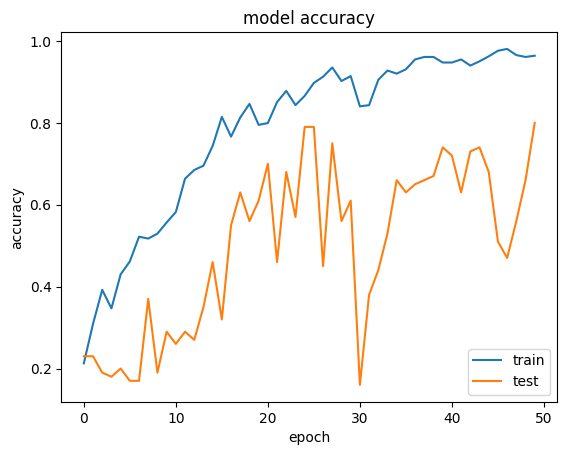

In [19]:
# visualise training history			
plt.plot(CNN_3D_training.history['categorical_accuracy'])			
plt.plot(CNN_3D_training.history['val_categorical_accuracy'])			
plt.title('model accuracy')			
plt.ylabel('accuracy')			
plt.xlabel('epoch')			
plt.legend(['train', 'test'], loc="lower right")			
plt.show()			